In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import accuracy_score
from scipy import stats

In [2]:
x_all = fetch_california_housing(as_frame=True) # Attributes
df = pd.DataFrame(data=x_all.data)
# print(df.shape)
df = np.array(df)
# print(df.shape)
y_all = x_all.target # Target value - median house value
y_all = np.array(y_all).reshape(20640, 1)
print(y_all.shape)

(20640, 1)


In [3]:
x_train, x_test, y_train, y_test = train_test_split(df, y_all, test_size=0.2, random_state=10)
#print(x_train)

In [13]:
learning_rate=0.0000001
max_ite = 20

In [14]:
def batchGradientDescent(x, y):
    MSE = []
    prediction = []
    tht0 = np.random.rand(8)
    tht1 = 0
    for i in range(max_ite):
        pre = np.array(np.dot(tht0.T, x.T) + tht1).reshape(x.shape[0], 1)
        tmp = y - pre
        tht0 = tht0.reshape(8, 1) - learning_rate * (-(2 / x.shape[0]) * (x.T.dot(tmp)))
        tht1 = tht1 - learning_rate * (-(2 / x.shape[0]) * np.sum(tmp))
        e = np.mean(np.square(y - pre))
        MSE.append(e)
        prediction.append(pre)

    return prediction, MSE

In [15]:
prediction, MSE= batchGradientDescent(x_train, y_train)

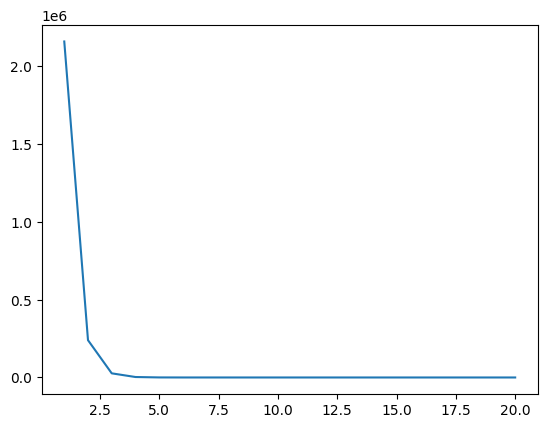

In [16]:
plt.plot(list(range(1,21)), MSE)
plt.show()

In [7]:
print(prediction)

[array([[-12.76972613],
       [-65.90441138],
       [-53.69671025],
       ...,
       [-40.54945339],
       [-40.63691855],
       [-52.84017326]]), array([[ 26.84445297],
       [-56.9281907 ],
       [-37.48677075],
       ...,
       [-16.85878001],
       [-16.94295109],
       [-34.43715568]]), array([[ 40.00246075],
       [-53.88820425],
       [-32.05856527],
       ...,
       [ -8.96214624],
       [ -9.04358818],
       [-28.28665989]]), array([[ 44.34614338],
       [-52.82605183],
       [-30.2225359 ],
       ...,
       [ -6.32760244],
       [ -6.40650569],
       [-26.21835021]]), array([[ 45.75321802],
       [-52.42291692],
       [-29.58334436],
       ...,
       [ -5.44622884],
       [ -5.52265909],
       [-25.51012356]]), array([[ 46.18195809],
       [-52.23941057],
       [-29.34293801],
       ...,
       [ -5.14896197],
       [ -5.22294333],
       [-25.2550594 ]]), array([[ 46.28479962],
       [-52.12914189],
       [-29.23543036],
       ...,
      

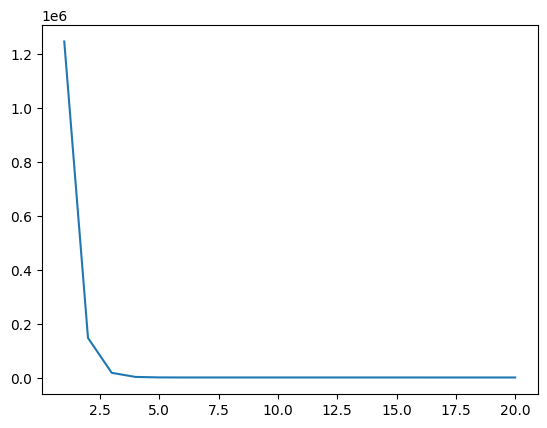

In [8]:
prediction, MSE= batchGradientDescent(x_test, y_test)

plt.plot(list(range(1,21)), MSE)
plt.show()

In [9]:
print(prediction)

[array([[ 229.89714709],
       [1154.34797408],
       [1170.44187472],
       ...,
       [ 831.09851909],
       [ 852.45112058],
       [ 371.11516746]]), array([[ 63.6198956 ],
       [393.58292928],
       [395.32695088],
       ...,
       [281.46966084],
       [291.57380725],
       [122.36253305]]), array([[  6.60758686],
       [132.67523208],
       [129.49639133],
       ...,
       [ 92.97725552],
       [ 99.22305153],
       [ 37.06369467]]), array([[-12.93130732],
       [ 43.19827509],
       [ 38.32965738],
       ...,
       [ 28.33995878],
       [ 33.26191038],
       [  7.82284491]]), array([[-19.61836189],
       [ 12.51508649],
       [  7.06551064],
       ...,
       [  6.17991786],
       [ 10.64725815],
       [ -2.19241121]]), array([[-21.89777588],
       [  1.99576503],
       [ -3.65448722],
       ...,
       [ -1.41216171],
       [  2.89867946],
       [ -5.61408746]]), array([[-22.66556615],
       [ -1.60817467],
       [ -7.32868014],
       ...,


In [45]:
learning_rate=0.00001
max_ite = 1000
def stochasticGradient(x, y):
    MSE = []
    prediction = []
    tht0 = np.random.rand(8)
    tht1 = 0
    for i in range(max_ite):
        tmp = np.random.randint(0, x.shape[0]-1)
        x_r = x[tmp]
        y_r = y[tmp]
        pre = np.array(np.dot(tht0.T, x_r.T) + tht1)
        prediction.append(pre)
        tht0 = tht0 - learning_rate * (-(1/x.shape[0])*((np.array(x_r.reshape(8, 1))).dot(y_r - pre)))
        tht1 = tht1 - learning_rate * (-(1/x.shape[0])*np.sum(y_r-pre))
        e = np.mean(np.square(y_r-pre))
        MSE.append(e)


    return prediction, MSE

In [54]:
prediction, MSE= stochasticGradient(x_train, y_train)

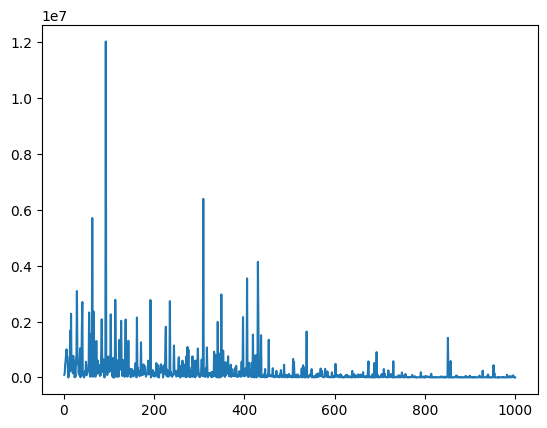

In [49]:
plt.plot(list(range(1,1001)), MSE)
plt.show()

In [55]:
print(prediction)

[array(542.75294899), array(858.32040608), array(161.49842944), array(515.60781149), array(181.90450536), array(127.5255135), array(217.51147505), array(208.72972794), array(262.32660952), array(380.13233943), array(704.15065516), array(350.24727934), array(285.23047906), array(252.59303417), array(294.08771193), array(485.23534762), array(491.73484117), array(558.16134482), array(314.70059975), array(305.91457745), array(334.34626625), array(1210.66475149), array(233.96754856), array(385.46368132), array(317.79839595), array(337.21585832), array(307.53643923), array(498.58669463), array(383.68469731), array(367.07182658), array(118.12875799), array(279.61254682), array(194.36795875), array(323.68790391), array(515.15845551), array(521.52080081), array(171.10080012), array(249.87787002), array(192.43580691), array(407.26065738), array(316.08464411), array(735.81616954), array(289.139136), array(162.29642241), array(347.10265734), array(195.25515192), array(193.25304413), array(224.3989

In [50]:
prediction, MSE= stochasticGradient(x_test, y_test)

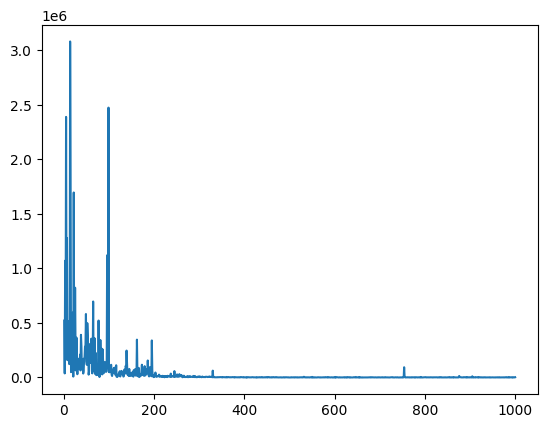

In [51]:
plt.plot(list(range(1,1001)), MSE)
plt.show()

In [53]:
print(prediction)

[array(727.038624), array(194.03731323), array(1035.96264914), array(619.28138956), array(1547.54724896), array(773.68247475), array(1132.70298274), array(400.43295833), array(719.20700855), array(598.08050713), array(470.59833095), array(351.90623869), array(367.83820825), array(1756.17310714), array(1383.69619786), array(225.17940647), array(339.25442244), array(497.88461479), array(275.9435531), array(773.97945516), array(90.60655852), array(1303.97218659), array(272.50150318), array(330.03570593), array(908.32582963), array(505.68759528), array(253.02006167), array(608.96405165), array(424.23918217), array(174.96048836), array(419.3155266), array(309.34411483), array(343.98355146), array(289.87200601), array(334.08866399), array(459.02636898), array(256.04033463), array(627.02536883), array(535.88001842), array(296.72127387), array(410.16223925), array(327.42071027), array(191.12495775), array(248.60117981), array(421.08311953), array(431.3967651), array(535.59193242), array(540.55

In [62]:
learning_rate=0.00001
max_ite = 8000
def miniBatch(x, y):
    MSE = []
    predction = []
    tht0 = np.random.rand(8)
    tht1 = 0
    for i in range(max_ite):
        tmp = np.random.randint(0, x.shape[0]-1, 32)
        x_r = x[tmp]
        y_r = y[tmp]
        pre = np.array(np.dot(tht0.T, x_r.T) + tht1).reshape(32, 1)
        tht0 = tht0.reshape(8, 1) - learning_rate * (-(1/x.shape[0])*(x_r.T.dot(y_r - pre)))
        tht1 = tht1 - learning_rate * (-(1/x.shape[0])*np.sum(y_r-pre))
        e = np.mean(np.square(y_r-pre))
        MSE.append(e)
        prediction.append(pre)

    return prediction, MSE

In [63]:
prediction, MSE = miniBatch(x_train, y_train)

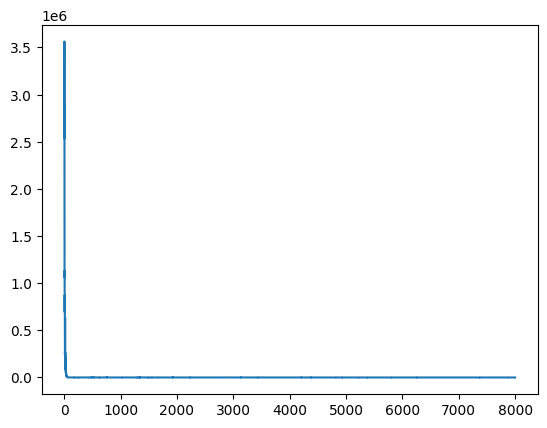

In [64]:
plt.plot(list(range(1,8001)), MSE)
plt.show()

In [65]:
print(prediction)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [43]:
prediction, MSE = miniBatch(x_test, y_test)

55.32091689571728

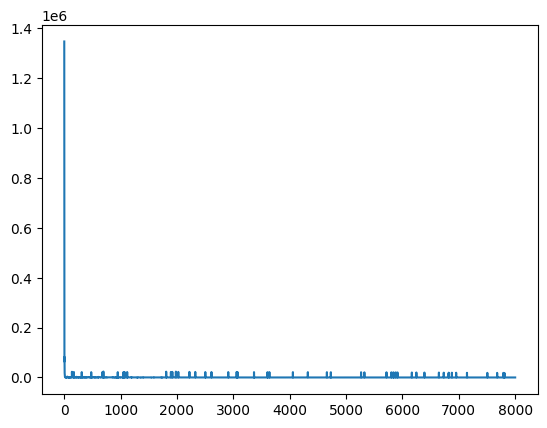

In [44]:
plt.plot(list(range(1,8001)), MSE)
plt.show()